<a href="https://colab.research.google.com/github/uDanielArthur/airbnb_Vancouver/blob/main/Vancouver_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática**
*by [Daniel Arthur](https://www.linkedin.com/in/udanielarthur)*

---

# Análise dos Dados do Airbnb - *Vancouver, Canadá*

<center><img alt="Baía de Vancouver" width="100%" src="https://img.freepik.com/fotos-gratis/vista-do-porto-de-vancouver-com-predios-de-apartamentos-urbanos-e-barco-de-baia-no-canada_649448-2638.jpg?w=996&t=st=1696405497~exp=1696406097~hmac=662b618f8dacfc4cb2ba946ba216bc82d9d59b6572032a6b9d8506a3cf4633bf"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.


Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


**Vancouver** por diversas vezes foi considerada a cidade com a melhor qualidade de vida do Canadá. O mais interessante disso tudo, é que o próprio Canadá já foi considerado o país com a melhor qualidade de vida do mundo. Em outras palavras, estamos falando da melhor cidade em um país com a melhor qualidade de vida do mundo. Nada mal para a cidade, nada mal para o Canadá.

No verão, o clima é fresco e bastante úmido, e a temperatura raramente atinge os 30°C. No inverno, é mais comum que a temperatura chegue a zero graus. Se atingir temperatura negativa, não costuma passar de -10°C. É bastante raro escutar raios ou grandes trovoadas, ao contrário do que se está acostumado na área central e leste do Canadá.

Este clima proporciona a Vancouver um dos maiores terminais de cruzeiro de passageiros do mundo. Principalmente entre os meses de maio a outubro, a cidade recebe navios diariamente, e a maioria deles tem endereço certo: chegar ao Alasca. Nos dias de maior movimento, em torno de 15 mil pessoas embarcam e desembarcam nos terminais de cruzeiros.

Uma movimentada cidade portuária na costa oeste da Colúmbia Britânica, que está entre as cidades mais densas e etnicamente diversas do Canadá. Um local muito procurado para gravações de filmes, cercada por montanhas e um rico cenário artístico, teatral e musical.

Neste *notebook*, analisaremos os dados referentes à cidade de Vancouver e ver quais percepções podem ser extraídos a partir de dados brutos.


<center><img alt="Science Center" width="50%" src="https://img.freepik.com/fotos-gratis/vancouver-science-world_198523-43.jpg?w=740&t=st=1696410976~exp=1696411576~hmac=c66508077d5532f5b57c61940a048cfc43865eff665ca70a0a2b2b9278ad7738"></center>

*Texto adaptado do portal [Travelmate](https://www.travelmate.com.br/vancouver-resumida-em-10-interessantes-curiosidades/)*


## Obtenção dos Dados


In [1]:
# importação dos pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

# configuração da visualização
sns.set_style()
%matplotlib inline

In [2]:
# importação do arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2023-06-10/visualisations/listings.csv", sep=',')

## Análise dos Dados
Esta análise se orientará pelo seguinte dicionário de variáveis:

**Dicionário das variáveis**

* `id` — Número de id gerado para identificar o imóvel
* `name` — Nome da propriedade anunciada
* `host_id` — Número de id do proprietário (anfitrião) da propriedade
* `host_name` — Nome do anfitrião
* `neighbourhood_group` — Esta coluna não contém nenhum valor válido
* `neighbourhood` — Nome do bairro
* `latitude` — Coordenada da latitude da propriedade
* `longitude` — Coordenada da longitude da propriedade
* `room_type` — Informa o tipo de quarto que é oferecido
* `price` — Preço para alugar o imóvel
* `minimum_nights` — Quantidade mínima de noites para reservar
* `number_of_reviews` — Número de reviews que a propriedade possui
* `last_review` — Data do último review
* `reviews_per_month` — Quantidade de reviews por mês
* `calculated_host_listings_count` — Quantidade de imóveis do mesmo anfitrião
* `availability_365` — Número de dias de disponibilidade dentro de 365 dias
* `df` — Dataframe com dados brutos
* `df_clear` — Datafreme com dados limpos

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [3]:
# identificando o volume de dados do DataFrame
print('Volume de dados',
      f'\nVariáveis: {df.shape[1]}'
      f'\nEntradas: {df.shape[0]}')
# verificando as 5 primeiras entradas do dataset
df.head()


Volume de dados 
Variáveis: 18
Entradas: 6355


id                                               name  host_id  \
0  13188  Rental unit in Vancouver · ★4.83 · Studio · 2 ...    51466   
1  13358  Condo in Vancouver · ★4.68 · 1 bedroom · 1 bed...    52116   
2  13490  Rental unit in Vancouver · ★4.92 · 1 bedroom ·...    52467   
3  14267  Home in Vancouver · ★4.76 · 1 bedroom · 2 beds...    56030   
4  14424  Guest suite in Vancouver · ★4.69 · 1 bedroom ·...    56709   

        host_name  neighbourhood_group             neighbourhood  latitude  \
0     Family Guns                  NaN                Riley Park  49.24773   
1            Lynn                  NaN                  West End  49.28201   
2            Iris                  NaN  Kensington-Cedar Cottage  49.25622   
3  Peter & Alison                  NaN  Kensington-Cedar Cottage  49.24922   
4     Samantha Jo                  NaN         Downtown Eastside  49.27921   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -123.10509  Entire home/apt    150               3                260   
1 -123.12669  Entire home/apt    227               1                454   
2 -123.06607  Entire home/apt    150              30                 98   
3 -123.08139  Entire home/apt    150               3                 34   
4 -123.08835  Entire home/apt    134              30                266   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2023-06-01               1.61                               2   
1  2023-05-22               2.88                               1   
2  2023-05-01               0.67                               1   
3  2021-07-14               0.22                               1   
4  2023-05-25               1.64                               4   

   availability_365  number_of_reviews_ltm    license  
0               150                      4  22-156193  
1               247                     19  22-311727  
2               121                      5        NaN  
3                 0                      0  21-156500  
4               187                      7  19-162091

In [4]:
#verificando as ultimas entradas
df.tail()

id                                               name  \
6350  909441856435440521  Rental unit in Vancouver · ★New · 2 bedrooms ·...   
6351  909449559503146188  Home in Vancouver · ★New · 1 bedroom · 1 bed ·...   
6352  909475142117498102  Rental unit in Vancouver · ★New · 1 bedroom · ...   
6353  909538682993188639  Home in Vancouver · ★New · 1 bedroom · 1 bed ·...   
6354  909578425542231309  Rental unit in Vancouver · ★New · 3 bedrooms ·...   

        host_id host_name  neighbourhood_group   neighbourhood   latitude  \
6350  474073067       Zoe                  NaN        Downtown  49.275740   
6351   82112046     Allie                  NaN     Shaughnessy  49.239280   
6352  227662329    Jordan                  NaN  Mount Pleasant  49.266040   
6353   31047232      Gwen                  NaN      Kerrisdale  49.230884   
6354  287607431    Elliot                  NaN        Downtown  49.274960   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
6350 -123.115920  Entire home/apt    500               5                  0   
6351 -123.149150     Private room     44              30                  0   
6352 -123.097260  Entire home/apt     82              30                  0   
6353 -123.163359     Private room     45               1                  0   
6354 -123.127950  Entire home/apt    599              30                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
6350         NaN                NaN                              16   
6351         NaN                NaN                               1   
6352         NaN                NaN                             112   
6353         NaN                NaN                               2   
6354         NaN                NaN                               3   

      availability_365  number_of_reviews_ltm    license  
6350               364                      0  22-765489  
6351               179                      0        NaN  
6352               363                      0        NaN  
6353               106                      0  23-238530  
6354               362                      0        NaN

In [5]:
# verificando os tipos de dados
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Os tipos de dados apresentam todas as características desejáveis para cada tipo de variável, dessa forma não é necessário fazer alteração nos tipos de dados das colunas. O estudo irá prosseguir para a análise de valores ausentes por coluna.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [6]:
# Colocando em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            38.882769
reviews_per_month                  17.419355
last_review                        17.419355
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

* Percebe-se que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* A variável `licence` possui valores nulos em quase metade das linhas.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em pelo menos 17% das entradas.
##### O foco dessa análise é localidade, preço, tipo de quarto, quais são as localidades mais caras, o que as pessoas estão procurando quando buscam o Airbnb, dispensando no momento a análise qualitativa sobre cada unidade disponível para aluguel.
##### Dessa forma, as reviews ausentes, e as licenças ausentes no dataset não possuem valor para esta análise. Em função disso, as calunas `neighbourhood_group`, `licence`, `reviews_per_month` e `last_review` serão excluídas para aumentar a qualidade do *dataset*.
##### Como as outras variáveis não possuem anomalias em entradas específicas, não será necessário fazer nenhuma outra modificação adicional.

In [7]:
# Excluindo as colunas no dataset
df.drop(columns=['neighbourhood_group', 'license', 'reviews_per_month', 'last_review'], inplace =True)

In [8]:
# Verificando valores ausentes
(df.isnull().sum()).sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

# **Q3. Outliers e distribuição das variáveis**
Será utilizado a seguir o cálculo da regra do IQR Score como limite para lidar com os outliers presentes nesse conjunto de dados. Se fará a distribuição estatística e a utilização do gráfico boxplot, por ser adequado para esse fim.


##Apresentando o conceito:

O IQR (abreviação da do termo em inglês 'interquartile range') é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%) e avalia o grau de espalhamento dos dados em torno da medida de centralidade, extremamente eficiente para identificação de outliers.

## IQR = Q3 — Q1

In [9]:
# Verificando a distribuição estatística
df.describe()

id       host_id     latitude    longitude         price  \
count  6.355000e+03  6.355000e+03  6355.000000  6355.000000   6355.000000   
mean   3.288925e+17  1.747044e+08    49.263141  -123.112591    250.515972   
std    3.807700e+17  1.695789e+08     0.020564     0.038044    571.811061   
min    1.318800e+04  6.033000e+03    49.202960  -123.221859     14.000000   
25%    2.898755e+07  2.260310e+07    49.251027  -123.131027    120.000000   
50%    5.119770e+07  1.137402e+08    49.269439  -123.115937    179.000000   
75%    7.376943e+17  2.975667e+08    49.279076  -123.090590    275.000000   
max    9.095784e+17  5.186788e+08    49.294360  -123.023680  28386.000000   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count     6355.000000        6355.000000                     6355.000000   
mean        16.147600          38.722738                        6.200944   
std         31.905929          69.252692                       16.311660   
min          1.000000           0.000000                        1.000000   
25%          2.000000           2.000000                        1.000000   
50%          3.000000          11.000000                        1.000000   
75%         30.000000          46.000000                        3.000000   
max        900.000000         888.000000                      112.000000   

       availability_365  number_of_reviews_ltm  
count       6355.000000            6355.000000  
mean         133.116601              13.159402  
std          118.588650              20.025863  
min            0.000000               0.000000  
25%           27.000000               0.000000  
50%           97.000000               3.000000  
75%          244.000000              19.000000  
max          365.000000             147.000000

Após esta distribuição é válido destacar:

* A variável `price` trata do preço da diária do imóvel em moeda local, dólar canadense (CAD).
* A variável `price` apresenta mínimo de 14. Nota-se que seu Q3 está em 275, mas o máximo está em C$28 386, claramente há outliers nessa variável
* A variável `minimum_nights` tem como seu máximo 900, além de ser irrazoável nesse contexto, seu Q3 está em 30. Há outliers nessa variável.
* As variáveis `number_of_reviews`, `calculated_host_listings_count` e `availability_365` também possuem outliers, mas não serão úteis nesse momento.

Será plotado a seguir os gráficos para a verificação das distribuições.

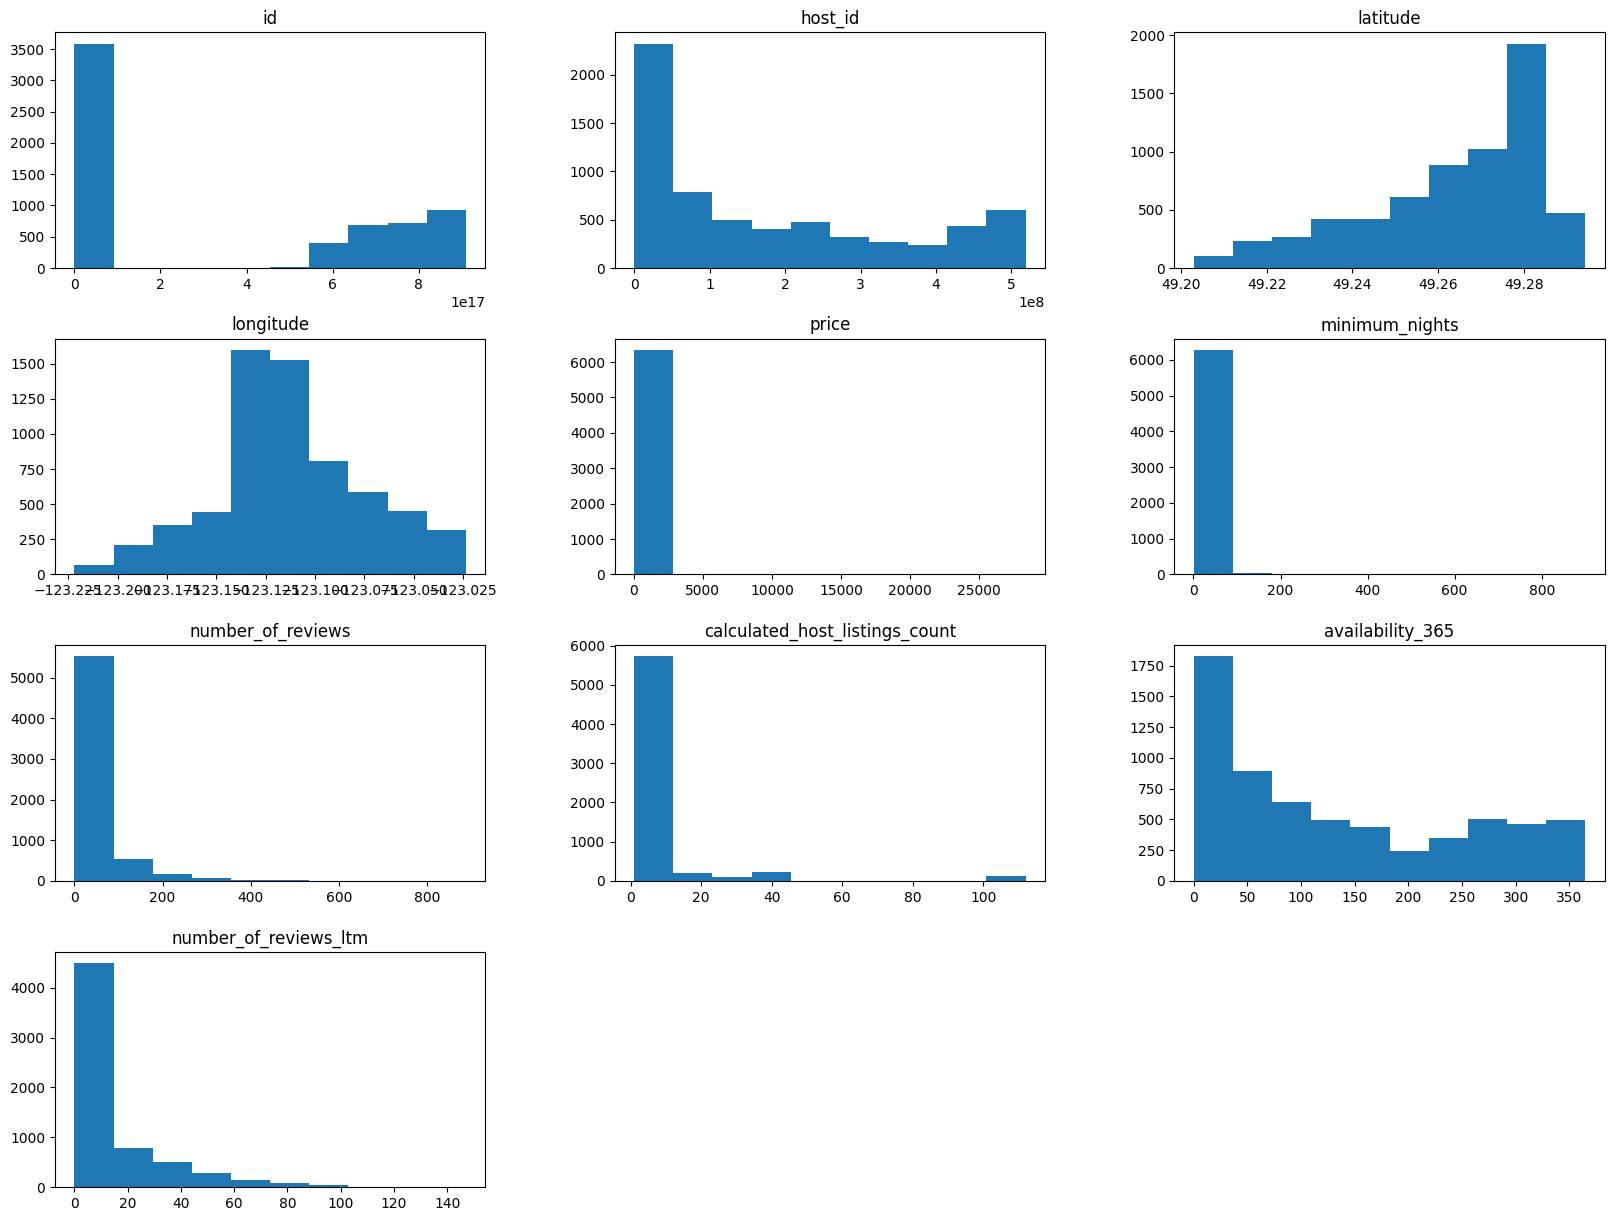

In [10]:
# verificando as distribuições
df.hist(figsize=(20, 15), grid=False);

Verificando os histogramas fica visível a existência dos outliers. Para tratá-los seguir-se-ão os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.

In [11]:
# Identificando os outliers da variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
iqr_price = q3_price - q1_price
print(f'IQR Score da variável price: {iqr_price}')

# Definindo os limites da variável price
lim_sup_price = q3_price + iqr_price * 1.5
lim_inf_price = q1_price - iqr_price * 1.5

print(f'Limite superior da variável price: {lim_sup_price}')
print(f'limite inferior da variável price: {lim_inf_price}')

IQR Score da variável price: 155.0
Limite superior da variável price: 507.5
limite inferior da variável price: -112.5


A partir da definição do limite nota-se que não há outliers inferiores.

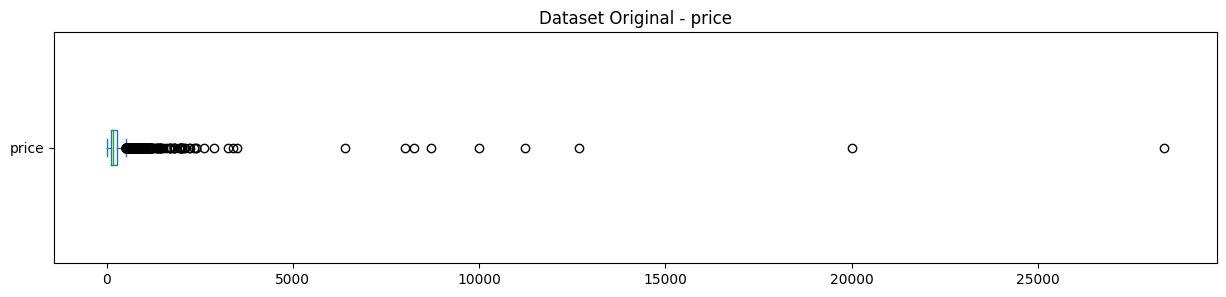

O dataset possui 6355 colunas
374 entradas acima de 507.5
Representam 5.89% do dataset


In [12]:
# verificando o conjunto original da variável price
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print(f'O dataset possui {df.shape[0]} colunas')
print(f'{len(df[df.price > 507.5])} entradas acima de 507.5')
print(f'Representam {(len(df[df.price > 507.5]) / df.shape[0])* 100 :.2f}% do dataset')

In [13]:
# Identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights
print(f'IQR da variável minimum_nights: {iqr_minimum_nights}')

# Definindo os limites
lim_inf_minimum_nights = q1_minimum_nights - iqr_minimum_nights * 1.5
lim_sup_minimum_nights = q3_minimum_nights + iqr_minimum_nights * 1.5

print(f'Limite inferior da minimum_nights: {lim_inf_minimum_nights}')
print(f'Limite superior da minimum_nights: {lim_sup_minimum_nights}')

IQR da variável minimum_nights: 28.0
Limite inferior da minimum_nights: -40.0
Limite superior da minimum_nights: 72.0


Também não há ocorrência de outliers inferiores para `minimum_nights`.

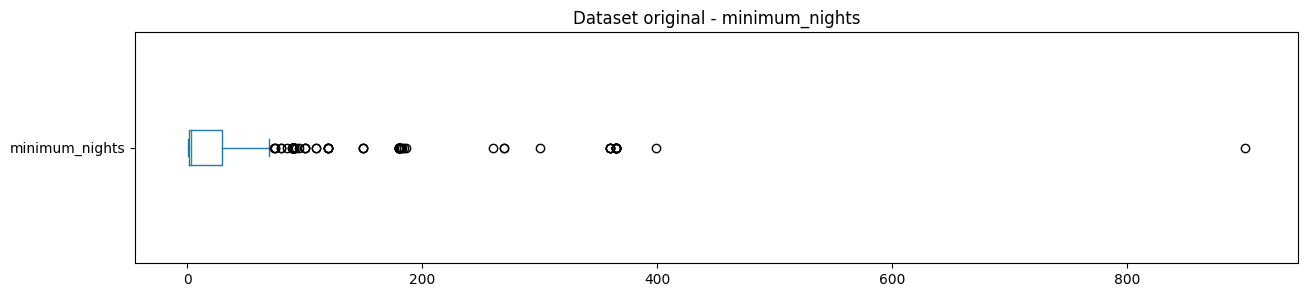

O dataset possui 6355 colunas
157 entradas acima de 72
Representam 2.47% do dataset


In [14]:
# Verificando o conjunto original da variável minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset original - minimum_nights')
plt.show()
print(f'O dataset possui {df.shape[0]} colunas')
print(f'{len(df[df.minimum_nights > 72])} entradas acima de 72')
print(f'Representam {(len(df[df.minimum_nights > 72]) / df.shape[0])*100 :.2f}% do dataset')

Efetuando a limpeza do dataset bruto `df` para o dataset limpo `df_clean`:

In [15]:
# Limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 507.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 72].index, axis=0, inplace=True)

print(f'Shape original:  {df.shape}')
print(f'Shape após remoção dos outliers: {df_clean.shape}')

Shape original:  (6355, 14)
Shape após remoção dos outliers: (5830, 14)


Comparando os gráficos boxplot da variável `price`:

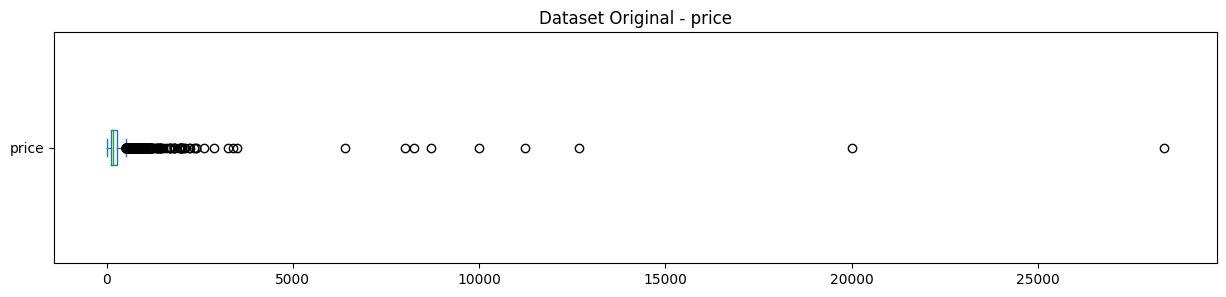

O dataset possui 6355 colunas
374 entradas acima de 507.5
Representam 5.89% do dataset


In [16]:
# Plotando novamente o conjunto original da variável price
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print(f'O dataset possui {df.shape[0]} colunas')
print(f'{len(df[df.price > 507.5])} entradas acima de 507.5')
print(f'Representam {(len(df[df.price > 507.5]) / df.shape[0])* 100 :.2f}% do dataset')

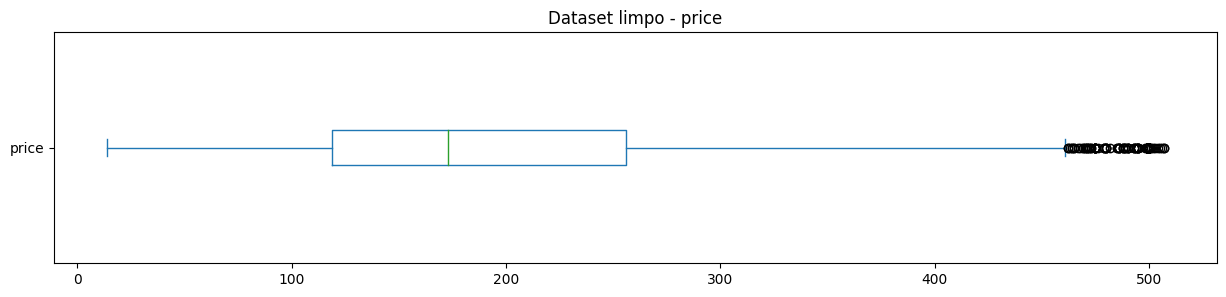

Tamanho orifinal: 6355
Tamanho atual: 5830


In [17]:
# Comparando com o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset limpo - price')
plt.show()
print(f'Tamanho orifinal: {df.shape[0]}')
print(f'Tamanho atual: {df_clean.shape[0]}')

Comparando os gráficos boxplot da variável `minimum_nights`:

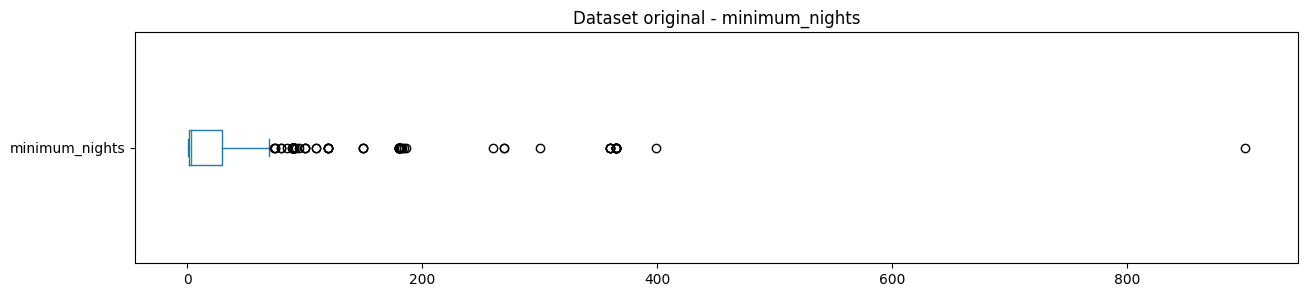

O dataset possui 6355 colunas
157 entradas acima de 72
Representam 2.47% do dataset


In [18]:
# Plotando novamente o conjunto original da variável minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset original - minimum_nights')
plt.show()
print(f'O dataset possui {df.shape[0]} colunas')
print(f'{len(df[df.minimum_nights > 72])} entradas acima de 72')
print(f'Representam {(len(df[df.minimum_nights > 72]) / df.shape[0])*100 :.2f}% do dataset')

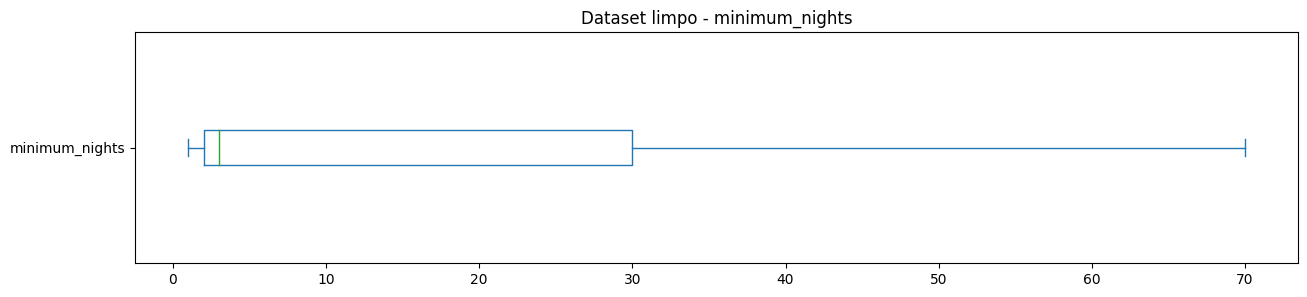

Tamanho orifinal: 6355
Tamanho atual: 5830


In [19]:
# Verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset limpo - minimum_nights')
plt.show()
print(f'Tamanho orifinal: {df.shape[0]}')
print(f'Tamanho atual: {df_clean.shape[0]}')

Este é o resultado da limpeza.

O boxplot da variável `price` mostra alguns dados como outliers, entretanto, esses estão sendo calculados em relação ao novo dataset, e a limpeza considerou os quartis do dado original.

Para garantir que não há outliers prejudiciais à análise, plota-se os histogramas novamente.

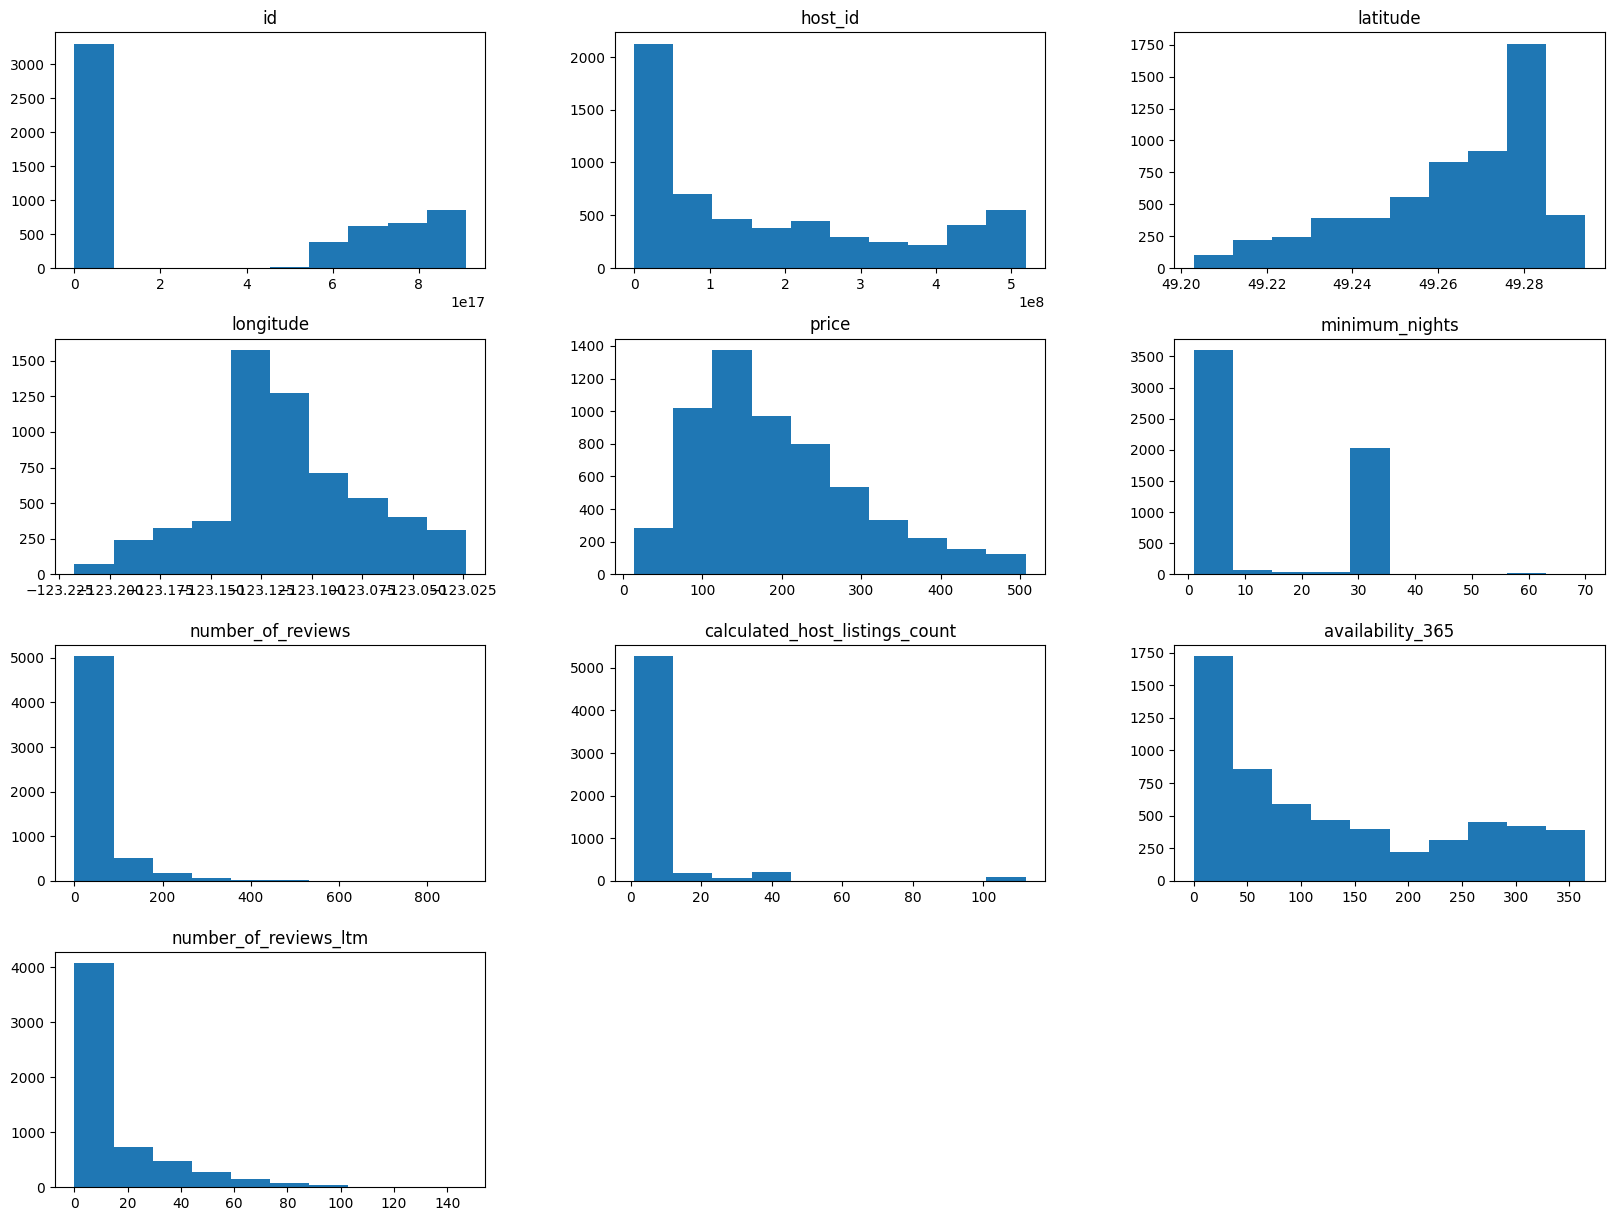

In [20]:
# Verificando as distribuições
df_clean.hist(figsize=(20,15), grid=False);

Melhorou-se bastante a visualização dos histogramas das variáveis `price` e `minimum_nights`.

Adiante, verifica-se a distribuição estatística dos dados limpos.

In [21]:
# Verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

id      host_id  latitude  longitude   price  minimum_nights  \
count  5.830000e+03       5830.0    5830.0     5830.0  5830.0          5830.0   
mean   3.277732e+17  175420860.8      49.3     -123.1   196.3            12.8   
std    3.806428e+17  169629159.9       0.0        0.0   103.6            13.8   
min    1.318800e+04       6033.0      49.2     -123.2    14.0             1.0   
25%    2.879277e+07   22851388.2      49.3     -123.1   119.0             2.0   
50%    5.118107e+07  116243896.0      49.3     -123.1   173.0             3.0   
75%    7.375064e+17  299385675.2      49.3     -123.1   256.0            30.0   
max    9.095387e+17  518678816.0      49.3     -123.0   507.0            70.0   

       number_of_reviews  calculated_host_listings_count  availability_365  \
count             5830.0                          5830.0            5830.0   
mean                40.3                             6.1             128.5   
std                 71.0                            16.0             116.3   
min                  0.0                             1.0               0.0   
25%                  2.0                             1.0              25.0   
50%                 11.0                             1.0              92.0   
75%                 48.0                             3.0             233.0   
max                888.0                           112.0             365.0   

       number_of_reviews_ltm  
count                 5830.0  
mean                    13.6  
std                     20.3  
min                      0.0  
25%                      0.0  
50%                      4.0  
75%                     20.0  
max                    147.0


Alguns destaques:

* A mediana das variáveis `price` e `minimum_nights` foram pouquíssimo afetadas pela limpeza dos outliers, mostrando mais uma vez a robustez desse atributo como solução para dados ausentes.

* A média das variáveis `price` e `minimum_nights`foram reduzidas drasticamente, enfatizando a sensibilidade desse atributo em relação aos outliers.

* As médias estão mais próximas das medianas

* Os dados agora respeitam as regras definidas no início do notebook, não há dados discrepantes nem dados faltantes e são condizentes com a realidade.

### **Q4. Qual a média dos preços de aluguel?**

In [22]:
# Vendo a média da coluna price
print(f'A média dos aluguéis na cidade de Vancouver é de C${df_clean.price.mean() :.2f}')

A média dos aluguéis na cidade de Vancouver é de C$196.34


### **Q4. Qual a correlação existente entre as variáveis?**

Para identificar as correlações existentes entre as variáveis de interesse será criada uma matriz de correlação e depois será gerado um *heatmap* a partir dessa matriz, utilizando a biblioteca `seaborn`.

In [23]:
# Criando uma matriz de correlação
correlacao = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()

# Mostrando a matriz de correlação
display(correlacao)

price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.265615           0.009868   
minimum_nights                 -0.265615        1.000000          -0.260038   
number_of_reviews               0.009868       -0.260038           1.000000   
calculated_host_listings_count -0.028190        0.198778          -0.125455   
availability_365                0.048664        0.220810          -0.073402   

                                calculated_host_listings_count  \
price                                                -0.028190   
minimum_nights                                        0.198778   
number_of_reviews                                    -0.125455   
calculated_host_listings_count                        1.000000   
availability_365                                      0.195591   

                                availability_365  
price                                   0.048664  
minimum_nights                          0.220810  
number_of_reviews                      -0.073402  
calculated_host_listings_count          0.195591  
availability_365                        1.000000

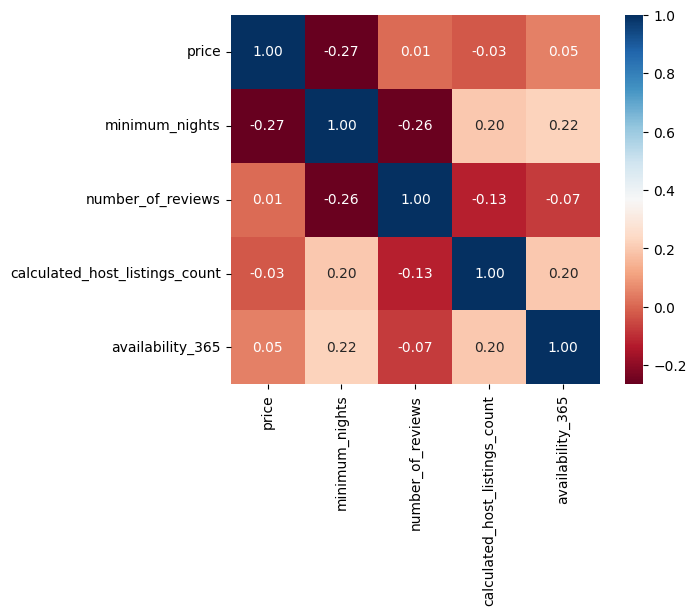

In [24]:
# Plotando um heatmap a partir das correlações
sns.heatmap(correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);



### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` indica o tipo de locação anunciada no Airbnb. O site disponibiliza opções de apartamentos e casas inteiras, aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Será contabilizado a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [25]:
# Mostrando a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4711
Private room       1095
Shared room          21
Hotel room            3
Name: room_type, dtype: int64

Representando a ocorrência por porcentagem em relação ao dataset:

In [26]:
# Mostrando a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0])*100

Entire home/apt    80.806175
Private room       18.782161
Shared room         0.360206
Hotel room          0.051458
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



Utilizando o `groupby` para analizar a média de preço agrupando por bairro.

In [27]:
# Verificando os preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Downtown                    236.917601
Downtown Eastside           219.116505
Kitsilano                   219.058957
West End                    208.645788
Strathcona                  207.868421
Shaughnessy                 195.951613
West Point Grey             194.536842
Arbutus Ridge               186.428571
Grandview-Woodland          183.087649
Riley Park                  181.845070
Fairview                    180.379310
Mount Pleasant              179.261538
Dunbar Southlands           174.784615
South Cambie                169.579710
Victoria-Fraserview         163.834711
Sunset                      161.742424
Killarney                   159.170455
Hastings-Sunrise            158.386555
Kensington-Cedar Cottage    156.307263
Marpole                     153.836735
Kerrisdale                  152.443182
Renfrew-Collingwood         149.530973
Oakridge                    131.292683
Name: price, dtype: float64

Distribuindo os dados de localização classificando pela variável `price`:

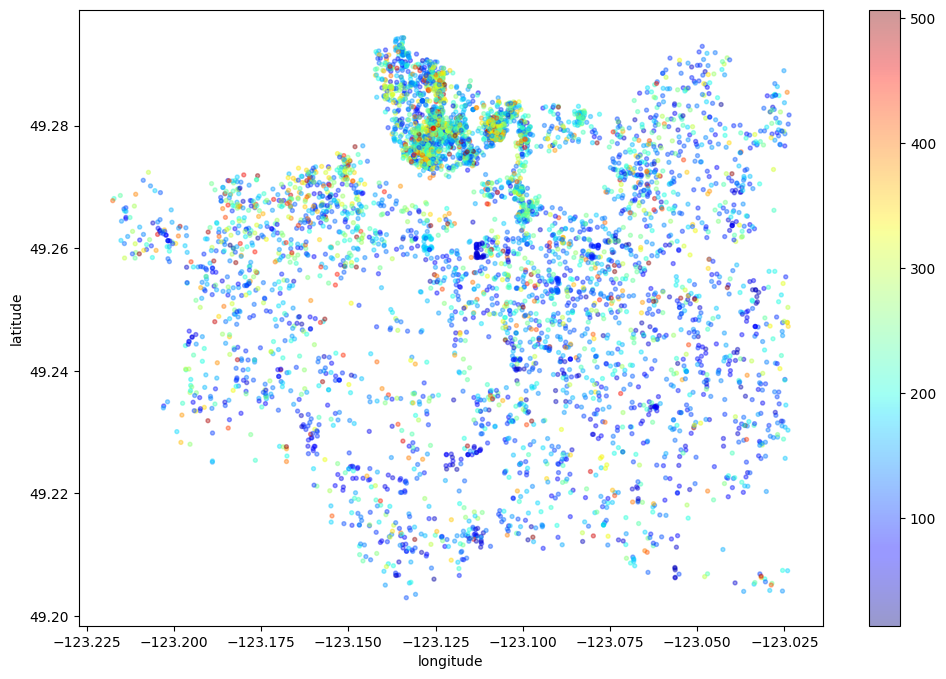

In [28]:
# Plotando os imóveis pela latitude-longitude

df_clean.plot(kind='scatter', x= 'longitude', y= 'latitude', alpha= 0.4, c= df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));



Com base nessa plotagem limpa, é possível perceber que há imóveis mais caros dispersos por todo o mapa, indicando um bom desenvolvimento urbano e uma baixa taxa de desigualdade social local. A seguir, serão plotados gráficos com mapas integrados, um clusterizando os pontos de aluguéis com base nos preços e um heatmap para visualizar melhor a influência das intervenções urbanísticas nos preços dos imóveis.

Utilizando a biblioteca Folium para integrar o mapa aos dados e o `marker_cluster` para agrupá-los interativamente conforme o zoom.

In [29]:
# Criando um mapa inicial com base nas coordenadas dos seus dados
map_center = [df_clean['latitude'].mean(), df_clean['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12.2)

# Criando um cluster de marcadores
marker_cluster = MarkerCluster().add_to(m)

# Determine os valores mínimo e máximo de 'price'
min_price = df_clean['price'].min()
max_price = df_clean['price'].max()

# Função para mapear o preço para uma cor personalizada
def map_price_to_color(price):
    normalized_price = (price - min_price) / (max_price - min_price)  # Normaliza o preço entre 0 e 1
    # Escolha uma paleta de cores, por exemplo, de azul a vermelho
    r = int(255 * (1 - normalized_price))
    b = int(255 * normalized_price)
    g = 0
    return f'#{r:02X}{g:02X}{b:02X}'  # Formato de cor hexadecimal

# Adicionando os pontos do gráfico de dispersão ao cluster com cores baseadas em 'price'
for index, row in df_clean.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=7,
        color='',
        fill=True,
        fill_color=map_price_to_color(row['price']),  # Use a função para mapear o preço para uma cor
        fill_opacity=0.8
    ).add_to(marker_cluster)

# Exibindo o mapa
m


Infere-se desse cluster que o porto e a área próxima ao 'Vancouver Harbour Flight Centre' são os principais influenciadores no número de imóveis disponíveis na cidade e sua valorização, justificando os bairros *Downtown*, *Downtown Eastside*, *Kitsilano*, *West End* e *Strathcona* tenham médias acima de 200 dólares canadenses.

Utilizando a biblioteca Folium para integrar o mapa aos dados e `heat_map` para distribuí-los interartivamente conforme o zoom, influenciado pelo preço.

In [30]:

# Criando um mapa inicial com base nas coordenadas médias dos dados
map_center = [df_clean['latitude'].mean(), df_clean['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Calculando os pesos para o heatmap com base nos preços
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in df_clean.iterrows()]

# Criando o mapa de calor com base nos dados e ajustando o raio de influência
HeatMap(heat_data, radius=9, gradient={0.25: 'blue', 0.05: 'green', 0.75: 'yellow', 1: 'red'}).add_to(m)

# Adicionando um mapa de fundo
folium.TileLayer('openstreetmap').add_to(m)
m

A partir do heatmap é possível visualizar uma uniformidade na distribuição dos imóveis mais caros e mais baratos ao longo de toda a cidade e uma zona de calor protuberante entre Downtown e Strathcona. Ao dar zoom no mapa, percebe-se que o aumento se dá em função do Estádio BC Place fortemente alimentado pela estação Stadium-Chinatown da linha Expo, que atendem o centro de Vancouver, do sistema de trânsito rápido SkyTrain. Estes elementos urbanos podem influenciar no aumento da diária dos imóveis mais baratos do bairro, que serão analisados a seguir.

<center><img alt="BC Place" width="100%" src="https://images.prismic.io/bcplace/f145ccccae8721fc91e49b7cb1490f0aa1101bd5_hkp-krt-bcplace-aerial-9422-edit-v2_rgb200.jpg?auto=compress,format"></center>

Analisando os pontos máximos da varíavel `price` por bairro:

In [31]:
# Verificando as propriedades mais caras de cada bairro
df_clean.groupby(['neighbourhood']).price.max().sort_values(ascending=False)

neighbourhood
Shaughnessy                 507
Kensington-Cedar Cottage    507
West End                    506
Downtown                    504
Kitsilano                   503
Killarney                   502
Riley Park                  501
Arbutus Ridge               500
Mount Pleasant              500
Sunset                      500
South Cambie                500
Renfrew-Collingwood         500
West Point Grey             500
Kerrisdale                  500
Hastings-Sunrise            500
Fairview                    500
Downtown Eastside           500
Dunbar Southlands           499
Victoria-Fraserview         499
Marpole                     499
Oakridge                    486
Grandview-Woodland          475
Strathcona                  340
Name: price, dtype: int64

Aqui fica matematicamente visível o que foi constatado analisando os gráficos, os bairros influenciam pouco nos preços das propriedades mais caras, de forma que o bairro com média mais cara, *Downtown*, é apenas o 4º entre as unidades mais caras por bairro. Nota-se também que influência do estádio no tópico anterior não distorceu o valor da propriedade mais cara de *Strathcona*, o que deve ser percebido no preço das propriedades mais baratas. Ressalta-se também que 17 dos 23 bairros possuem o preço máximo acima de C$500, retomando a ideia de um bom desenvolvimento urbano e baixo nível de desigualdade social.

Analisando os pontos mínimos da varíavel `price` por bairro:

In [32]:
# Verificando as propriedades mais baratas de cada bairro
df_clean.groupby(['neighbourhood']).price.min().sort_values(ascending=False)

neighbourhood
Strathcona                  110
West Point Grey              50
Dunbar Southlands            45
Kerrisdale                   45
Shaughnessy                  44
Mount Pleasant               42
Downtown                     41
Killarney                    40
Riley Park                   37
Arbutus Ridge                36
Fairview                     35
South Cambie                 35
Grandview-Woodland           33
Sunset                       33
Oakridge                     32
Renfrew-Collingwood          30
West End                     30
Marpole                      28
Downtown Eastside            27
Kensington-Cedar Cottage     25
Hastings-Sunrise             25
Victoria-Fraserview          21
Kitsilano                    14
Name: price, dtype: int64

Finalmente percebe-se a influência do estádio no valor dos imóveis.
Como previsto anteriormente, a propriedade mais barata do bairro *Strathcona* é mais que o dobro do valor do segundo colocado, *West Point Grey*. Percebe-se também uma maior distribuição dos valores os elementos. O bairro com média mais cara é apenas o sétimo aqui. Acaso queiram conhecer a **maior piscina do Canadá**, que possui 137 metros de água salgada, ou até mesmo as origens do grupo ativista **Greenpeace** ao menor custo possível, o bairro **Kitsilano** proporciona a propriedade mais barata de toda Vancouver.

<center><img alt="Kitsilano Pool" width="60%" src="https://vancouver.ca/images/cov/icons/kits-pool-location-large-icon.jpg"></center>



Pela ciência, analisando as medianas da variável `price` por bairro.

In [33]:
# Verificando as propriedades mediana
df_clean.groupby(['neighbourhood']).price.quantile(.50).sort_values(ascending=False)

neighbourhood
Downtown                    229.0
Strathcona                  213.0
Downtown Eastside           208.0
Kitsilano                   197.0
West End                    177.0
Fairview                    175.0
Shaughnessy                 162.0
West Point Grey             160.0
Mount Pleasant              160.0
Arbutus Ridge               159.0
Riley Park                  155.0
Grandview-Woodland          155.0
South Cambie                150.0
Dunbar Southlands           149.0
Sunset                      146.0
Victoria-Fraserview         143.0
Killarney                   137.5
Kensington-Cedar Cottage    135.0
Marpole                     133.0
Hastings-Sunrise            130.0
Renfrew-Collingwood         127.0
Kerrisdale                  110.0
Oakridge                     98.5
Name: price, dtype: float64

Apenas seguindo extinto explorador de cientista, verificaram-se também as propriedades que ocupam a mediana de cada bairro. Por ser uma estatística mais imune aos outliers, estes valores são mais confiáveis para serem utilizados como base no planejamento de viagens. Nota-se que nem a propriedade mediana do bairro mais caro supera o valor do terceiro quartil, o qual é de `256.0`, em outras palavras, não há um bairro super-rico inacessível ao grande público nesse dataset.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [34]:
# Visualizando a média da variável minimum_nights
print(f'A média de noites mínimas para aluguel é de {df_clean.minimum_nights.mean() :.0f} dias')


A média de noites mínimas para aluguel é de 13 dias


## Conclusões


1. Diante dos dados, pode-se inferir que Vancouver conseguiu atingir um excelente nível de desenvolvimento urbano, possibilitando em quase todos os bairros as ocorrências de propriedades para todas as classes econômicas. Os valores médios aumentam naturalmente conforme se aproxima do centro da cidade, mas a boa distribuição de preços possibilita que o viajante possa escolher sua estadia mais pela localização do objetivo da viagem do que necessariamente pelo valor médio dos bairros.

2. O valor médio do bairro mais carro, *Downtown*, não chega a representar o dobro do valor do bairro mais barato, *Oakridge*.  O bairro *Strathcona* apresenta uma menor disparidade de preço da cidade, sendo a propriedade mais cara em disponível em C$340 e propriedade mais barata em 110 dólares canadenses a diária.

3. A plotagem limpa das localidades foi utilizada para verificar a distribuição das propriedades do mapa. A plotagem clusterizada foi utilizada para verificar as tendências geográficas na cidade, podendo perceber-se a preferência pelo bairro *Downtown* na disponibilidade das propriedades. O mapa de calor foi utilizado para a visualização da dispersão dos preços nas cidade e como os elementos urbanos poderiam influenciá-los, destacando aqui que o estádio e a estação de trem *Stadium-Chinatown* podem ter influenciado os preços mínimos do bairro *Strathcona*.

4. A ocorrência de outliers na variável `price` utilizando a regra do IQR Score representam apenas 5.89% do dataset, indicando uma boa qualidade nos dados fornecidos.

5. A pouca ocorrência de quartos de hotéis abre espaço para algumas hipóteses:  uma cultura pouco desenvolvida na cidade de usar o Airbnb como parceiro da rede hoteleira; uma inadequaçâo por parte da rede hoteleira diante dos [padrões exigidos](https://www.airbnb.com.br/help/article/1526) pelo airbnb para hotéis e outras empresas de hospitalidade; serviços digitais intermediários mais identificados com hotelaria e consequantemente mais utilidades para este fim.